In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Star.csv is a dataset which contains details that help classify the star according to its type.

In [47]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Stars.csv')

The target attribute here is :Star Type. The data needs to be classified iter as: (0-Red Dwarf,
     1-Brown Dwarf, 2-White
     Dwarf, 3-Main Sequence ,
     4-SuperGiants,
     5-HyperGiants)

In [48]:
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


Let us now observe the shape of the dataframe.

In [49]:
df.shape

(240, 7)

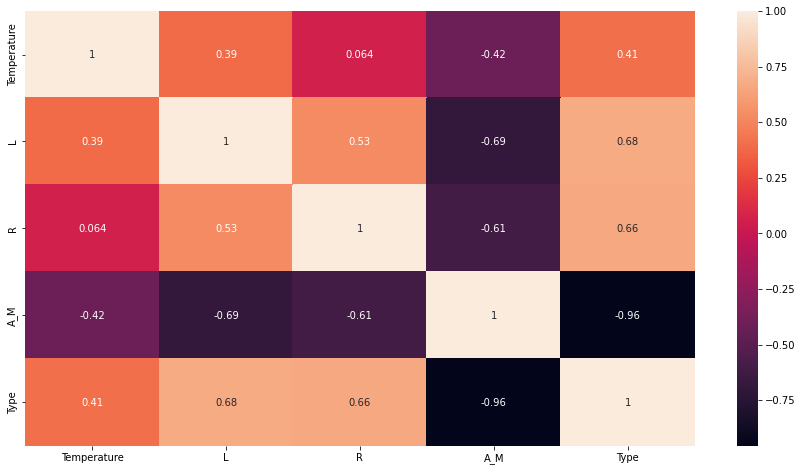

In [50]:
x = df.corr()
plt.figure(figsize = (15,8))
sns.heatmap(x,annot = True)

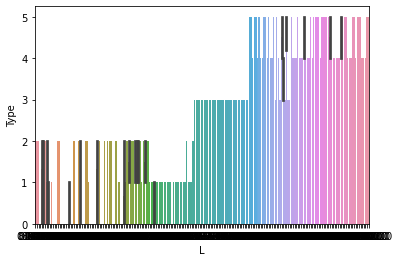

In [51]:
#these functions help select features that help predict the target
sns.barplot(data=df,x='L',y='Type')
plt.show()

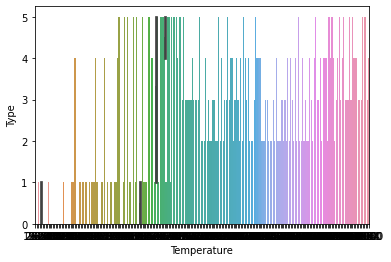

In [52]:
#these functions help select features that help predict the target
sns.barplot(data=df,x='Temperature',y='Type')
plt.show()

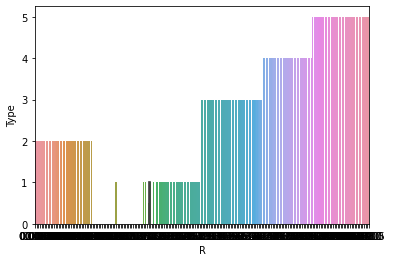

In [53]:
#these functions help select features that help predict the target
sns.barplot(data=df,x='R',y='Type')
plt.show()

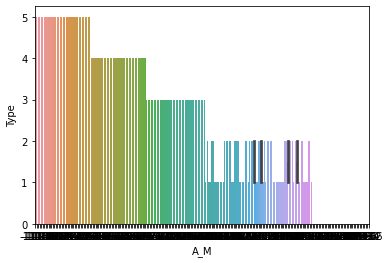

In [54]:
#these functions help select features that help predict the target
sns.barplot(data=df,x='A_M',y='Type')
plt.show()

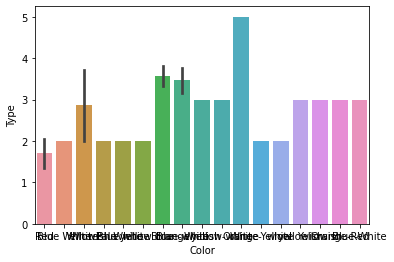

In [55]:
#these functions help select features that help predict the target
sns.barplot(data=df,x='Color',y='Type')
plt.show()

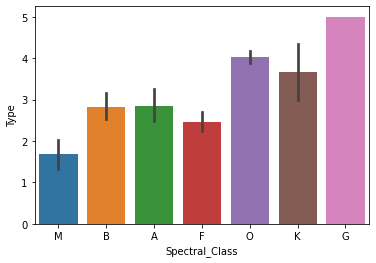

In [56]:
#these functions help select features that help predict the target
sns.barplot(data=df,x='Spectral_Class',y='Type')
plt.show()

In [57]:
print(df.columns.values)

['Temperature' 'L' 'R' 'A_M' 'Color' 'Spectral_Class' 'Type']


In [58]:
df['Type'].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Type, dtype: int64

we can see that for this particular dataset , the predictor features are 'Temperature' 'Luminosity' 'Radius' 'Absolute magnitude' 'Star color' 'spectral class'  as they all influence the classification of data.
this dataset is a balanced dataset.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


The data needs to be preprocessed.The non-numerical features need to be encoded to numerical features using label encoder.

In [60]:
from sklearn import preprocessing

In [61]:
labelEncoder = preprocessing.LabelEncoder()
df.iloc[:,4]=labelEncoder.fit_transform(df.iloc[:,4].values)
df.iloc[:,5]=labelEncoder.fit_transform(df.iloc[:,5].values)
df.iloc[:,6]=labelEncoder.fit_transform(df.iloc[:,6].values)

In [62]:
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,8,5,0
1,3042,0.000500,0.1542,16.60,8,5,0
2,2600,0.000300,0.1020,18.70,8,5,0
3,2800,0.000200,0.1600,16.65,8,5,0
4,1939,0.000138,0.1030,20.06,8,5,0


In [81]:
new_data=[9235,404940,1112.0,-11.23,10,0]

In [80]:
#Let's create numpy arrays for features and target
X = df[['Temperature' ,'L' ,'R', 'A_M' ,'Color' ,'Spectral_Class' ]]
y = df['Type']


In [65]:
#importing train_test_split
from sklearn.model_selection import train_test_split

It is a best practice to perform our split in such a way that out split reflects the labels in the data. In other words, we want labels to be split in train and test set as they are in the original dataset. So we use the stratify argument.
Also we create a test set of size of about 40% of the dataset.

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [67]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Error Rate')

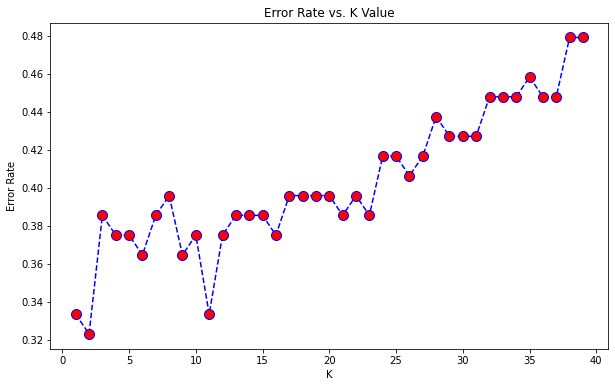

In [89]:
error_rate = []
# Will take some time
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue' ,linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [69]:
#plot accuracy vs k-value
train_accuracy =[]
test_accuracy = []
for i in range (1,40):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test)) 

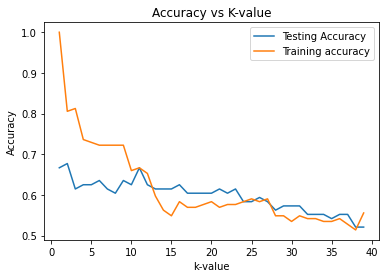

In [70]:
#Generate plot
plt.title('Accuracy vs K-value')
plt.plot(range(1,40),test_accuracy, label='Testing Accuracy')
plt.plot(range(1,40), train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('k-value')
plt.ylabel('Accuracy')
plt.show()

We can observe above that we get maximum testing accuracy for k=2. So lets create a KNeighborsClassifier with number of neighbors as 2.

In [71]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=2)

In [72]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [73]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.6770833333333334

In [74]:
predicted1= knn.predict([new_data]) 
print ("Predicted Value:", predicted1)
if predicted1==0:
  print("Red Dwarf")
if predicted1==1:
  print("Brown Dwarf")
if predicted1==2:
  print("White Dwarf")
if predicted1==3:
  print("Main sequence")
if predicted1==4:
  print("SuperGiants")
if predicted1==5:
  print("HyperGiants")

Predicted Value: [5]
HyperGiants


In [75]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [90]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[11  5  0  0  0  0]
 [ 5 11  0  0  0  0]
 [ 0  1 12  3  0  0]
 [ 0  4  7  3  1  1]
 [ 0  0  0  0 13  3]
 [ 0  0  0  0 16  0]]


In [91]:
#import classification_report
from sklearn.metrics import classification_report

In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69        16
           1       0.52      0.69      0.59        16
           2       0.63      0.75      0.69        16
           3       0.50      0.19      0.27        16
           4       0.43      0.81      0.57        16
           5       0.00      0.00      0.00        16

    accuracy                           0.52        96
   macro avg       0.46      0.52      0.47        96
weighted avg       0.46      0.52      0.47        96



Inference:-KNN calculates distance between test data and train data and predicts the result by considering the answers of k nearest neighbours. KNN doesn't make any assumptions hence is more accurate for smaller datasets. For larger datasets the speed and efficiency decreases